# India Agriculture Crop Production:
he dataset contains information about crop production in various states and districts of India, along with details such as crop type, year, season, area, production, and yield.

**Data Overview:**

- The dataset consists of 345,407 records and 10 columns. The columns include:
- 
State: The state in India where the crop was produced- .
District: The district within the state where the crop was produce- d.
Crop: The type of crop produc- ed.
Year: The year in which the crop was produ- ced.
Season: The season during which the crop was produced (e.g., Kharif, R- abi).
Area: The area of land used for crop produ- ction.
Area Units: The units of area measurement (e.g., Hectare, Square - Meter).
Production: The total production of t- he crop.
Production Units: The units of production measurement (e.g., Metric Tonnes, Ki- lograms).
Yield: The yield of the crop (production per 

**Machine Learning Analysis:**

- A machine learning model using Random Forest Regressor was implemented to predict crop production based on features        such as state, district, crop type, year, season, and area. The following steps were performed:
- 
Data Splitting: The dataset was split into training and testing sets- .
Feature Scaling: Features were scaled using StandardScaler to ensure uniformity and prevent biases in model trainin- g.
Model Training: A Random Forest Regressor model was trained on the training da- ta.
Model Evaluation: The trained model was evaluated on the testing data using Mean Squared Error (MSE) as the evaluation metric.unit area).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("India Agriculture Crop Production.csv")

In [3]:
df.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [4]:
df.shape[0]

345407

In [5]:
df.shape[1]

10

In [6]:
df.shape

(345407, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [8]:
df.columns

Index(['State', 'District', 'Crop', 'Year', 'Season', 'Area', 'Area Units',
       'Production', 'Production Units', 'Yield'],
      dtype='object')

In [9]:
df.isnull().sum()

State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield                 33
dtype: int64

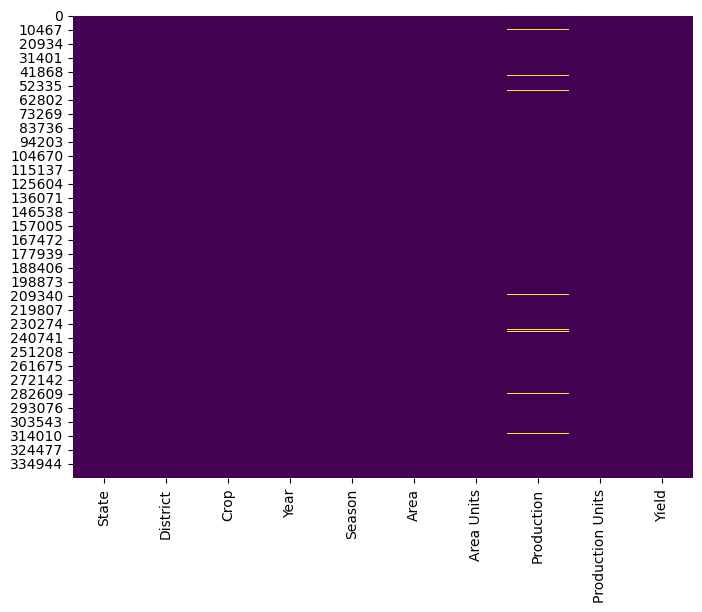

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [11]:
missing_value = df.isnull().sum().sort_values(ascending=False)
percentage = (missing_value / len(df)) * 100

missing_data = pd.concat([missing_value, percentage], axis=1, keys=['Missing Values', 'Percentage'])
print(missing_data)

                  Missing Values  Percentage
Production                  4993    1.445541
Area                          33    0.009554
Yield                         33    0.009554
Crop                          32    0.009264
Season                         1    0.000290
State                          0    0.000000
District                       0    0.000000
Year                           0    0.000000
Area Units                     0    0.000000
Production Units               0    0.000000


# Imputing Null Values 

In [12]:
# Production 
df.Production.fillna(df.Production.median(),inplace=True)

In [13]:
# Area 
df.Area.fillna(df.Area.median(),inplace=True)

In [14]:
# Yeild 
df.Yield.fillna(df.Yield.median(),inplace=True)

In [15]:
# Crop
df['Crop'].mode()[0]
df['Crop'].fillna(df['Crop'].mode()[0],inplace=True)

In [16]:
# Season
df['Season'].mode()[0]
df['Season'].fillna(df['Season'].mode()[0],inplace=True)

In [17]:
missing_value = df.isnull().sum().sort_values(ascending=False)
percentage = (missing_value / len(df)) * 100

missing_data = pd.concat([missing_value, percentage], axis=1, keys=['Missing Values', 'Percentage'])
print(missing_data)

                  Missing Values  Percentage
State                          0         0.0
District                       0         0.0
Crop                           0         0.0
Year                           0         0.0
Season                         0         0.0
Area                           0         0.0
Area Units                     0         0.0
Production                     0         0.0
Production Units               0         0.0
Yield                          0         0.0


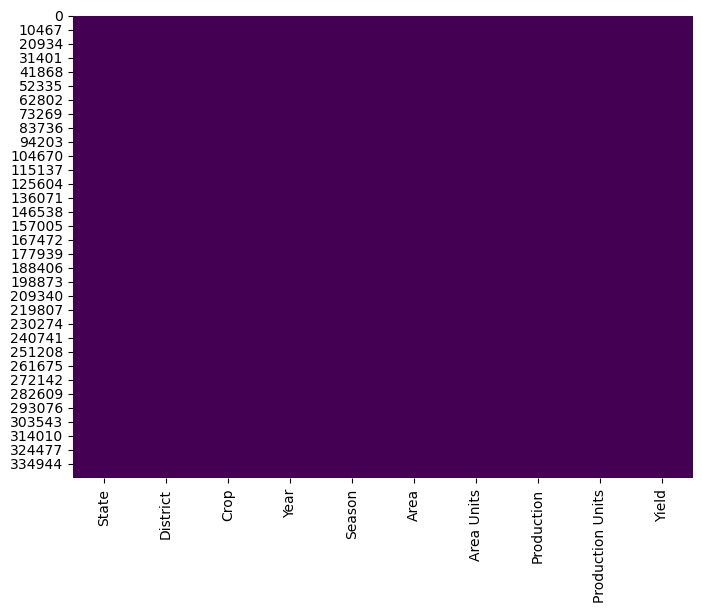

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [19]:
df.duplicated().sum()

0

In [20]:
df['Season'].value_counts()

Season
Kharif        138401
Rabi          100977
Whole Year     68689
Summer         22101
Winter          8250
Autumn          6989
Name: count, dtype: int64

In [21]:
df['Production Units'].value_counts()

Production Units
Tonnes    331686
Bales      10794
Nuts        2927
Name: count, dtype: int64

In [22]:
df.drop('Area Units',axis=1,inplace=True)

## Different type of Features

In [23]:
num_features = [feature for feature in df.columns if df[feature].dtype !='o']
print("Numerical feature :",len(num_features))

Numerical feature : 9


In [24]:
cat_features = [feature for feature in df.columns if df[feature].dtype =='o']
print("Categorical Feature :", len(cat_features))

Categorical Feature : 0


In [25]:
descrete_features=[ feature for feature in num_features if len(df[feature].unique())<=25]
print("Descrete Features:",len(descrete_features))

Descrete Features: 3


In [26]:
# Continuous Feature
con_features = [feature for feature in num_features if feature not in descrete_features]
print('Num of Continuous features:',len(con_features))

Num of Continuous features: 6


<Axes: >

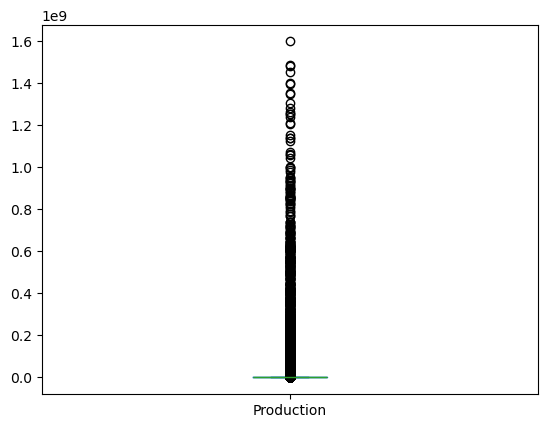

In [27]:
# Outlier Detection 
df['Production'].plot.box()

Area             Axes(0.125,0.53;0.110714x0.35)
Production    Axes(0.257857,0.53;0.110714x0.35)
Yield         Axes(0.390714,0.53;0.110714x0.35)
dtype: object

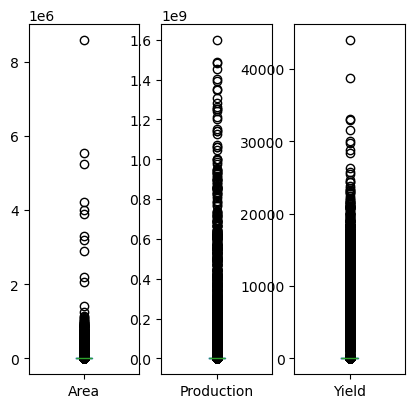

In [28]:
# Box Plot Method 
df.plot(kind='box',subplots=True,layout=(2,6),figsize =(10,10))

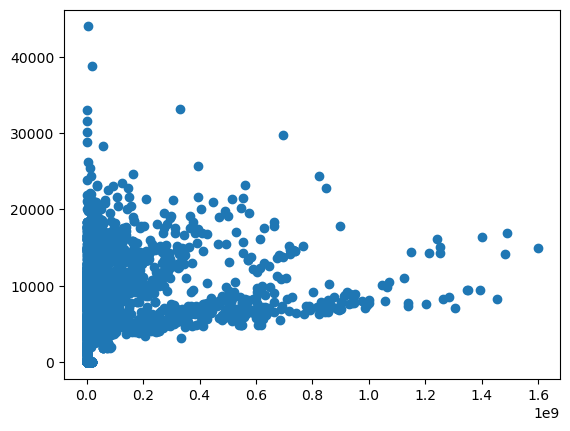

In [29]:
# 2 Scatter Plot 
plt.scatter(df['Production'],df['Yield'])

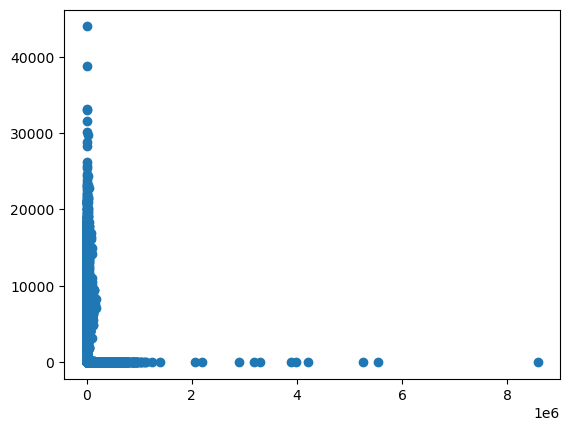

In [30]:
plt.scatter(df['Area'],df['Yield'])

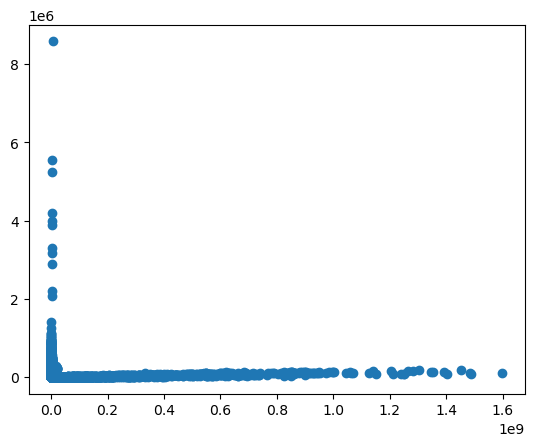

In [31]:
plt.scatter(df['Production'],df['Area'])

In [32]:
# 3)  z- Score Method 
from scipy.stats import zscore
def method(df, threshold=3):
    z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
    clean_outliers = (z_scores < threshold).all(axis=1)
    df_clean = df[clean_outliers]
    return df_clean

df_clean = method(df)
print(df_clean)

                              State                  District      Crop  \
0       Andaman and Nicobar Islands                  NICOBARS  Arecanut   
1       Andaman and Nicobar Islands                  NICOBARS  Arecanut   
2       Andaman and Nicobar Islands                  NICOBARS  Arecanut   
3       Andaman and Nicobar Islands  NORTH AND MIDDLE ANDAMAN  Arecanut   
4       Andaman and Nicobar Islands            SOUTH ANDAMANS  Arecanut   
...                             ...                       ...       ...   
345402                      Manipur               IMPHAL WEST      Rice   
345403                      Manipur                  SENAPATI      Rice   
345404                      Manipur                TAMENGLONG      Rice   
345405                      Manipur                   THOUBAL      Rice   
345406                      Manipur                    UKHRUL      Rice   

           Year      Season    Area  Production Production Units     Yield  
0       2001-02      K

In [33]:
df_clean = df

In [34]:
def method(df):
    # Select only numerical columns for outlier detection
    num_df = df.select_dtypes(include=[np.number])
    
    Q1 = num_df.quantile(0.25)
    Q3 = num_df.quantile(0.75)
    IQR = Q3 - Q1
    
    is_outlier = (num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))
    df_clean = df[~is_outlier.any(axis=1)]
    
    return df_clean

df_clean = method(df)
print(df_clean)

                              State                  District      Crop  \
0       Andaman and Nicobar Islands                  NICOBARS  Arecanut   
1       Andaman and Nicobar Islands                  NICOBARS  Arecanut   
2       Andaman and Nicobar Islands                  NICOBARS  Arecanut   
3       Andaman and Nicobar Islands  NORTH AND MIDDLE ANDAMAN  Arecanut   
4       Andaman and Nicobar Islands            SOUTH ANDAMANS  Arecanut   
...                             ...                       ...       ...   
345402                      Manipur               IMPHAL WEST      Rice   
345403                      Manipur                  SENAPATI      Rice   
345404                      Manipur                TAMENGLONG      Rice   
345405                      Manipur                   THOUBAL      Rice   
345406                      Manipur                    UKHRUL      Rice   

           Year      Season    Area  Production Production Units     Yield  
0       2001-02      K

Area             Axes(0.125,0.53;0.110714x0.35)
Production    Axes(0.257857,0.53;0.110714x0.35)
Yield         Axes(0.390714,0.53;0.110714x0.35)
dtype: object

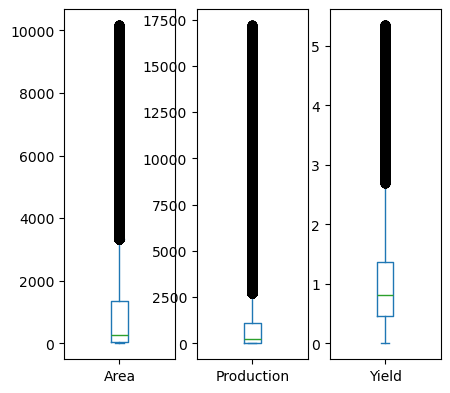

In [35]:
# Box Plot Method 
df_clean.plot(kind='box',subplots=True,layout=(2,6),figsize =(10,10))

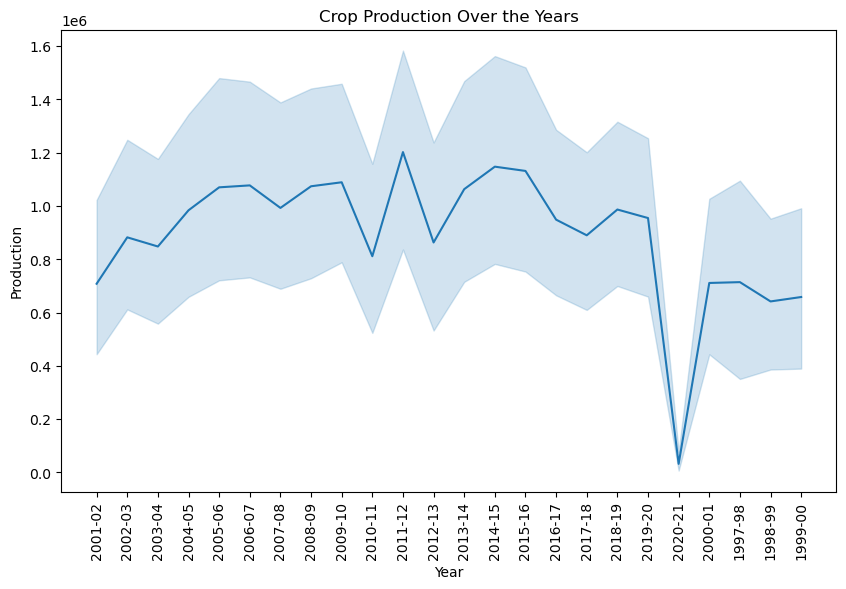

In [36]:
# Before Removing Outliers 
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Production')
plt.title('Crop Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.show()

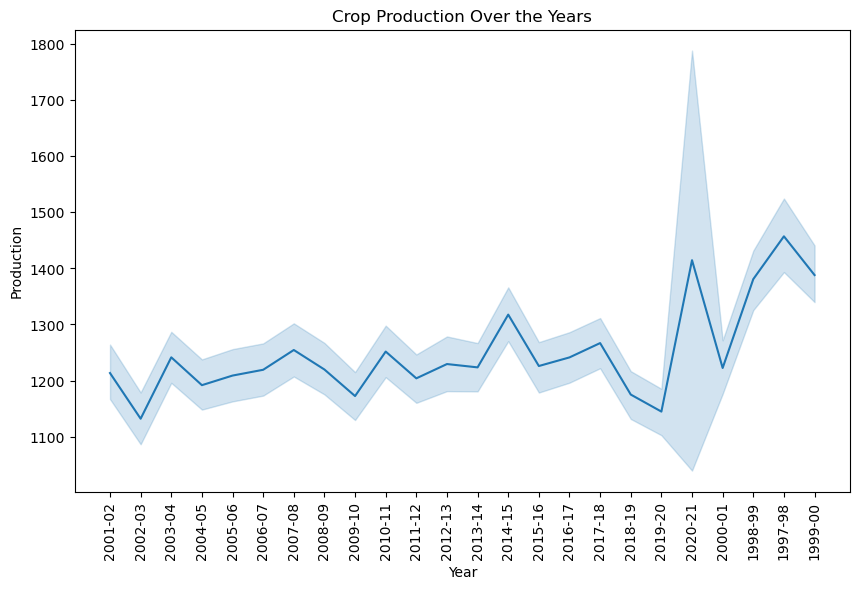

In [37]:
# After removing Out above graph showing 
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_clean, x='Year', y='Production')
plt.title('Crop Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.show()

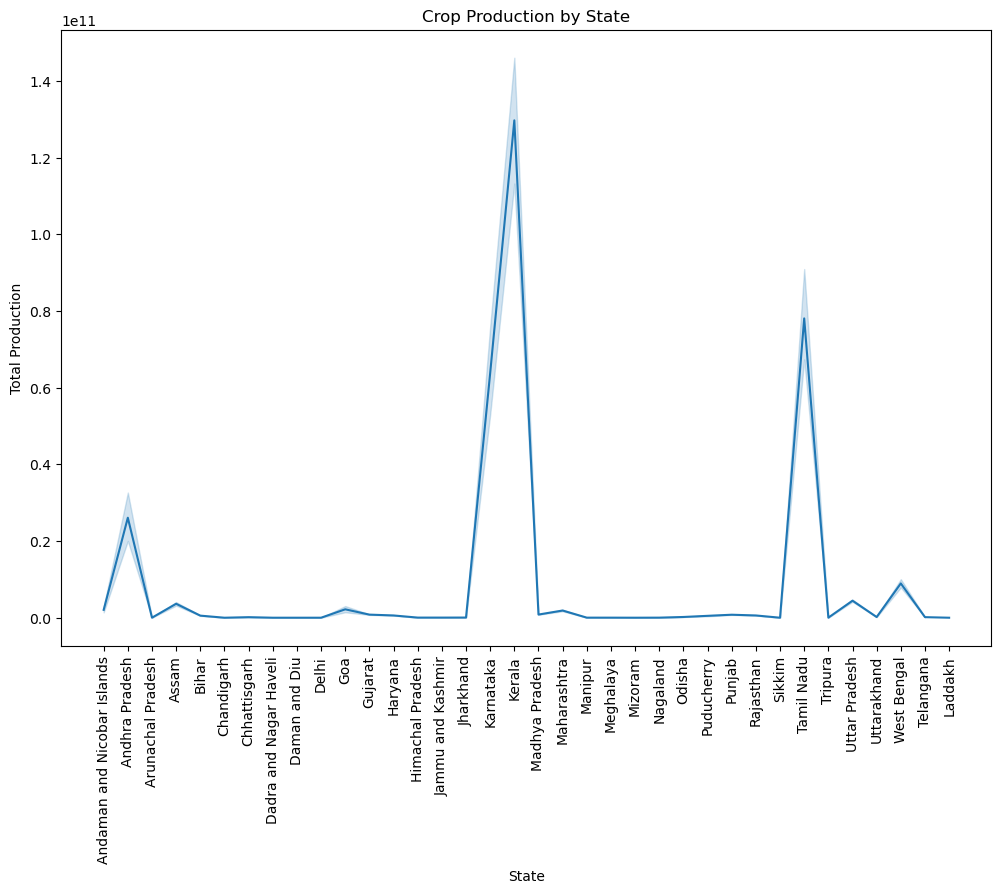

In [38]:
# Before data cleaning 
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='State', y='Production', estimator=sum)
plt.title('Crop Production by State')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=90)
plt.show()

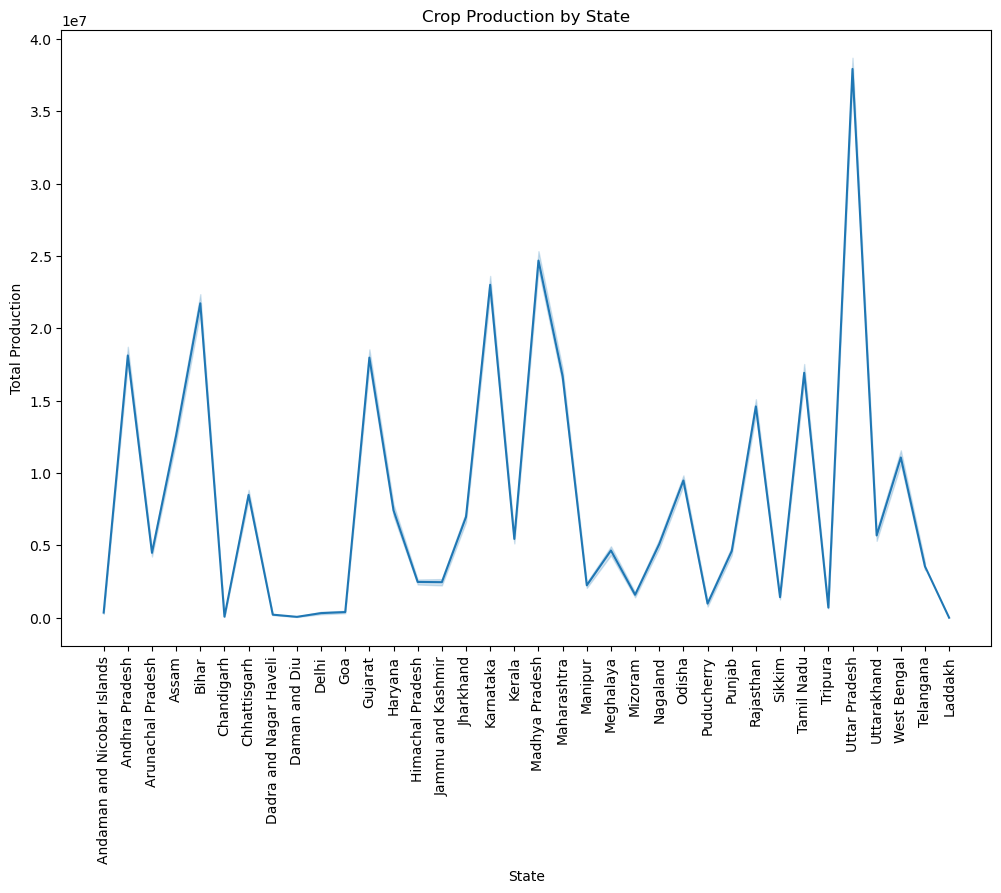

In [39]:
# After Data cleaning 
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_clean, x='State', y='Production', estimator=sum)
plt.title('Crop Production by State')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=90)
plt.show()

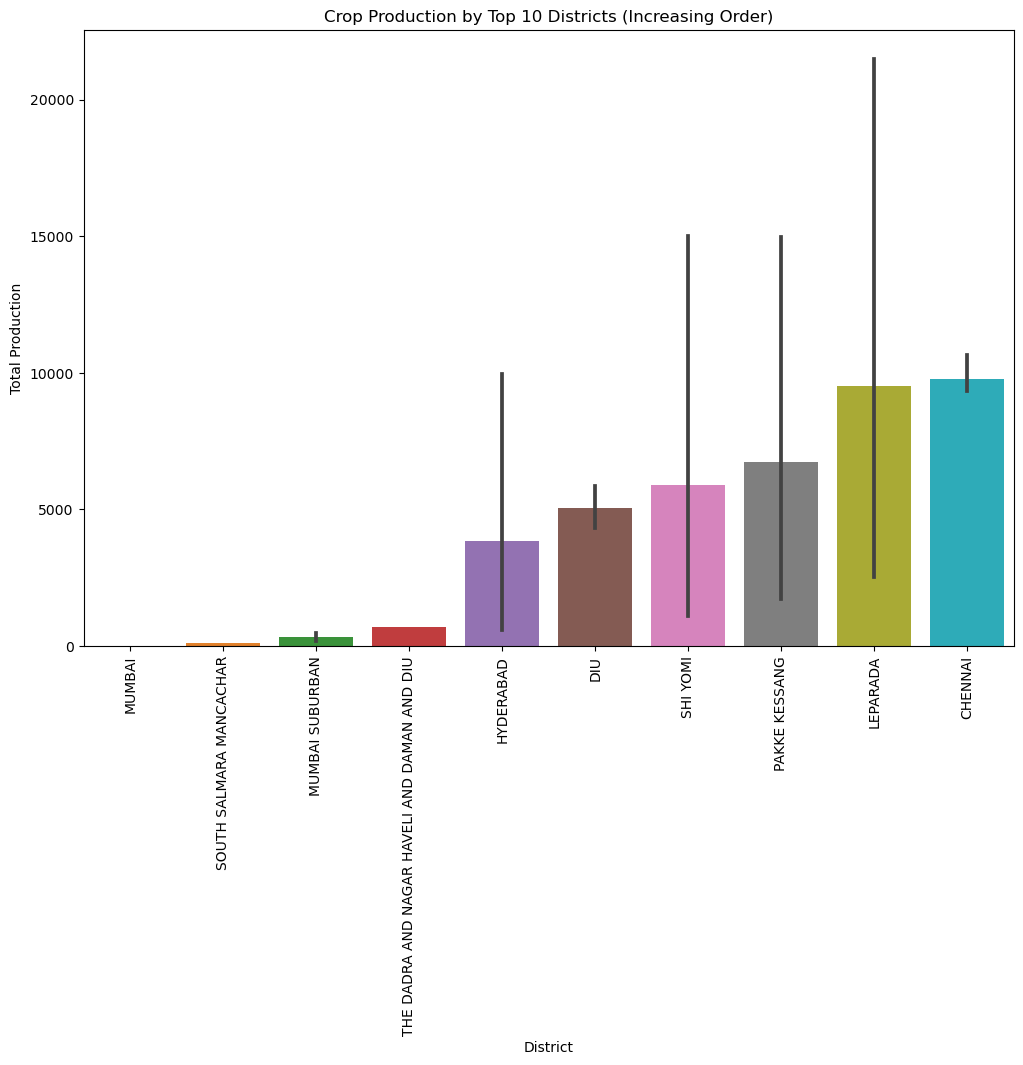

In [40]:
# Before data cleaning to 10 
# Calculate total production for each district and sort in ascending order
district_production = df.groupby('District')['Production'].sum().sort_values(ascending=True).head(10)

# Filter the original DataFrame to include only the top 10 districts
top_districts = district_production.index
df_top_districts = df[df['District'].isin(top_districts)]

# Ensure the DataFrame is sorted according to the production in ascending order
df_top_districts = df_top_districts.set_index('District').loc[top_districts].reset_index()

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=df_top_districts, x='District', y='Production', estimator=sum)
plt.title('Crop Production by Top 10 Districts (Increasing Order)')
plt.xlabel('District')
plt.ylabel('Total Production')
plt.xticks(rotation=90)
plt.show()

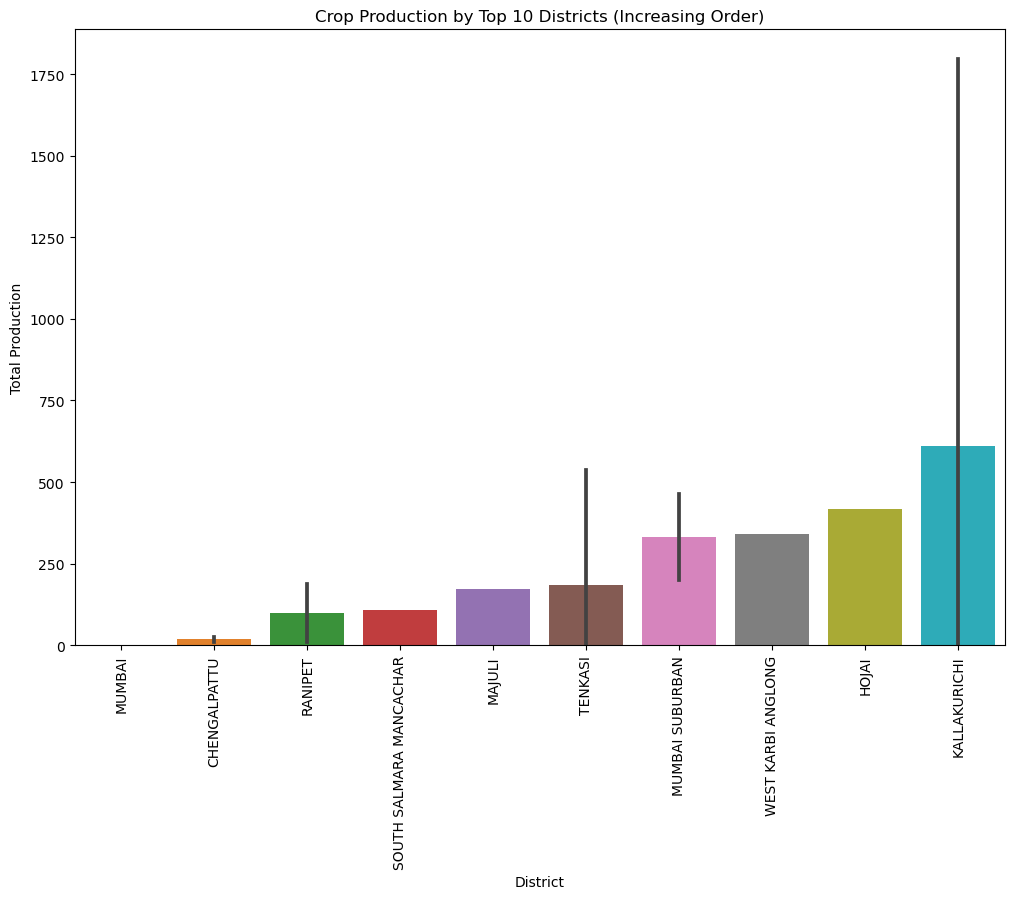

In [41]:
# Calculate total production for each district and sort in ascending order
district_production = df_clean.groupby('District')['Production'].sum().sort_values(ascending=True).head(10)

# Filter the original DataFrame to include only the top 10 districts
top_districts = district_production.index
df_top_districts = df_clean[df_clean['District'].isin(top_districts)]

# Ensure the DataFrame is sorted according to the production in ascending order
df_top_districts = df_top_districts.set_index('District').loc[top_districts].reset_index()

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=df_top_districts, x='District', y='Production', estimator=sum)
plt.title('Crop Production by Top 10 Districts (Increasing Order)')
plt.xlabel('District')
plt.ylabel('Total Production')
plt.xticks(rotation=90)
plt.show()

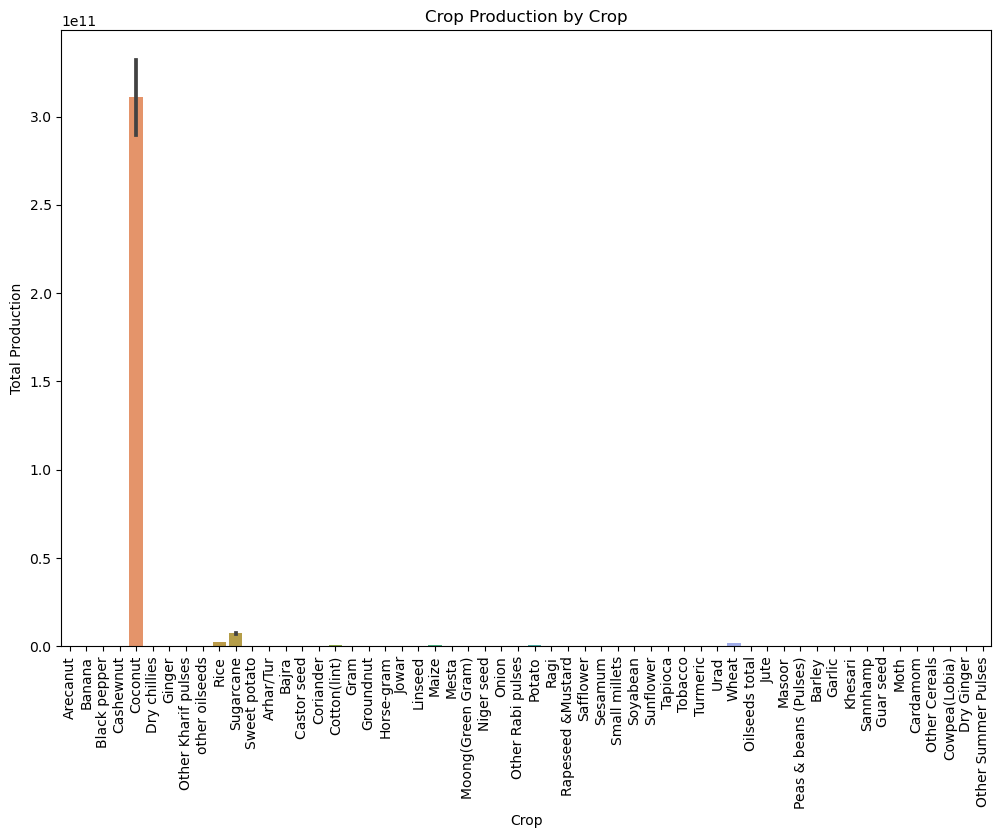

In [42]:
# Before Data Cleaning 
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Crop', y='Production', estimator=sum)
plt.title('Crop Production by Crop')
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.xticks(rotation=90)
plt.show()

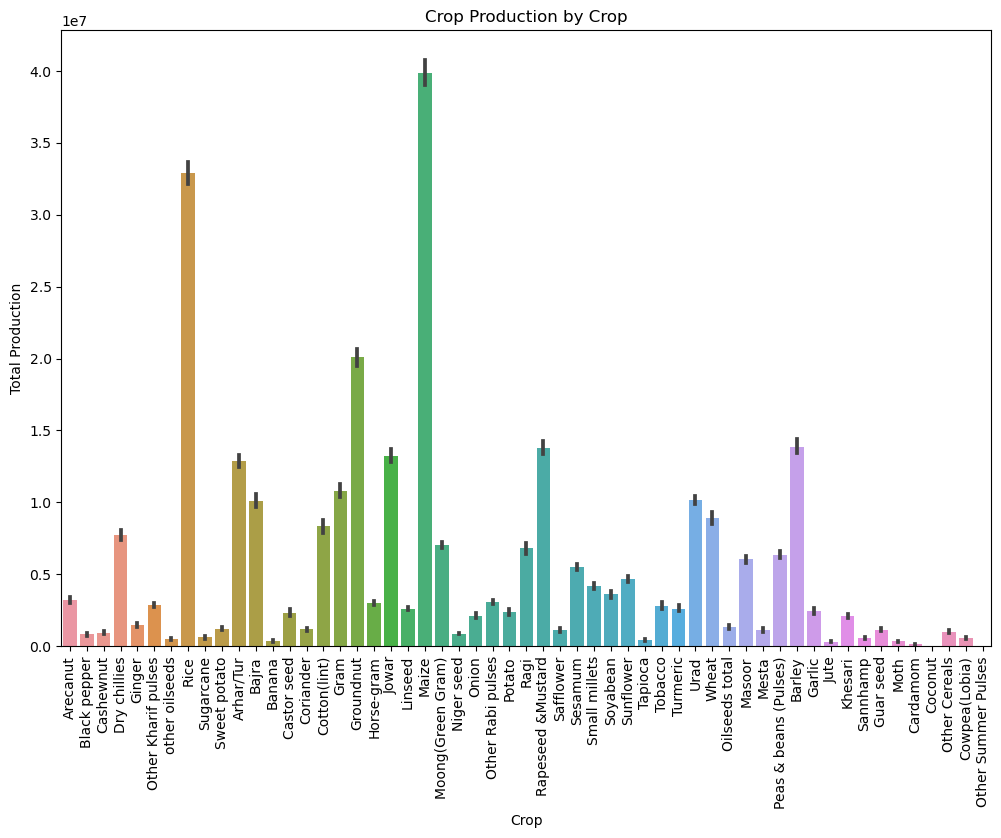

In [43]:
# After Data Cleaning 
plt.figure(figsize=(12, 8))
sns.barplot(data=df_clean, x='Crop', y='Production', estimator=sum)
plt.title('Crop Production by Crop')
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.xticks(rotation=90)
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [45]:
df.columns

Index(['State', 'District', 'Crop', 'Year', 'Season', 'Area', 'Production',
       'Production Units', 'Yield'],
      dtype='object')

In [46]:
df_clean = df # Assing clean dataset to the dataframe 

# Encoding categorical variables

In [47]:
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])
df['District'] = label_encoder.fit_transform(df['District'])
df['Crop'] = label_encoder.fit_transform(df['Crop'])
df['Year'] = label_encoder.fit_transform(df['Year'])
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Production Units'] = label_encoder.fit_transform(df['Production Units'])

In [48]:
df.head()

,State,District,Crop,Year,Season,Area,Production,Production Units,Yield
0,0,481,0,4,1,1254.0,2061.0,2,1.643541
1,0,481,0,5,4,1258.0,2083.0,2,1.655803
2,0,481,0,6,4,1261.0,1525.0,2,1.209358
3,0,485,0,4,1,3100.0,5239.0,2,1.690000
4,0,627,0,5,4,3105.0,5267.0,2,1.696296


In [49]:
# Splitting the data into train and test sets
X = df.drop(columns=['Production'])
y = df['Production']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X_train.shape,X_test.shape

((276325, 8), (69082, 8))

In [51]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
!pip install xgboost

# Model Training & Model Selection

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [54]:
# create Function to Evaluate Model 
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mse, mae, rmse, r2

In [55]:
# Begnning Models Training
models = {
    "Linear Regression":LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor": AdaBoostRegressor(),
    "Gradient boost Regressor": GradientBoostingRegressor(),
    "Xgboost Regressor": XGBRegressor()

}

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mse, model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mse, model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])

    print("Model Performance for training set")
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("="*35)

    print("Model Performance for test set")
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Linear Regression
Model Performance for training set
- Mean Squared Error: 360823904134004.7500
- Mean Absolute Error: 1622794.8653
- Root Mean Squared Error: 18995365.3330
- R2 Score: 0.1907
Model Performance for test set
- Mean Squared Error: 397564310128587.2500
- Mean Absolute Error: 1619840.6957
- Root Mean Squared Error: 19939014.7733
- R2 Score: 0.2063


Lasso
Model Performance for training set
- Mean Squared Error: 360823904134014.3125
- Mean Absolute Error: 1622793.8620
- Root Mean Squared Error: 18995365.3330
- R2 Score: 0.1907
Model Performance for test set
- Mean Squared Error: 397564309854648.8125
- Mean Absolute Error: 1619839.6908
- Root Mean Squared Error: 19939014.7664
- R2 Score: 0.2063


Ridge
Model Performance for training set
- Mean Squared Error: 360823904134105.1250
- Mean Absolute Error: 1622792.5602
- Root Mean Squared Error: 18995365.3330
- R2 Score: 0.1907
Model Performance for test set
- Mean Squared Error: 397564309556238.0625
- Mean Absolute Error: 1619838